In [99]:
import numpy as np
import math as math
from matplotlib import pyplot as plt 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random
from sympy import *
from numpy.linalg import inv
import time
import seaborn as sns

In [100]:
#Function

def new_temp (tx_1, txy, tx_neg1, ty_1, ty_neg1, C , dt):
  a = tx_1 - (2*txy*(1+C)) + tx_neg1 + (C*(ty_1 + ty_neg1))
  temp_output = (a*dt) + txy
  return temp_output

In [108]:
#2D Heat Transfer
#READ BEFORE USING
#THIS CODE ASSUMES THAT YOU ARE USING DIRICHLET BOUNDARY CONDITIONS

###### Step size
x_step = 0.05
y_step = 0.05
t_step = 1
C = (x_step**2)/(y_step**2)
###### Length of system
x_length = 1
y_length = 1
total_time = 10

###### DEFINING THE MATRIX

temperature = np.zeros((int(total_time/t_step) , 
                        int(x_length/x_step) + 1, 
                        int(y_length/y_step) + 1 ))

print(temperature.shape)
print("Time Steps, X Points, Y Points")
###### MATRIX IS DEFINED - DO NOT TOUCH OR SUFFER DEATH.

###### Boundary Conditions
# These are can be difficult to set-up, make sure you understand how the 
# matrix shape works before applying BCs


for i in range(1,int(x_length/x_step),1):
  temperature[:,i,0] = math.sin(pi*(i*x_step))
  #print (temperature[:,i,0])
  temperature[:,i,-1] = math.cos(2*pi*(i*x_step)) -1
  #print (temperature[:,i,-1])

temperature[:,0,:] = 0 # When x = 0
temperature[:,-1,:] = 0 # When X = L (last item in index)

print (temperature[0,:,:])


(10, 21, 21)
Time Steps, X Points, Y Points
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.15643447  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.04894348]
 [ 0.30901699  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.19098301]
 [ 0.4539905   0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.41221475]
 [ 0.587

In [109]:
# Initial Conditions

for i in range(1,int(x_length/x_step),1):
  #print(i)
  for j in range(1,int(y_length/y_step),1):
    #print(j)
    temperature[0,i,j] = (math.sin(pi*i*x_step))*(math.cos(4*pi*j*y_step))

print (temperature[0,:,:])

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.15643447  0.12655814  0.04834091 -0.04834091 -0.12655814 -0.15643447
  -0.12655814 -0.04834091  0.04834091  0.12655814  0.15643447  0.12655814
   0.04834091 -0.04834091 -0.12655814 -0.15643447 -0.12655814 -0.04834091
   0.04834091  0.12655814 -0.04894348]
 [ 0.30901699  0.25        0.0954915  -0.0954915  -0.25       -0.30901699
  -0.25       -0.0954915   0.0954915   0.25        0.30901699  0.25
   0.0954915  -0.0954915  -0.25       -0.30901699 -0.25       -0.0954915
   0.0954915   0.25       -0.19098301]
 [ 0.4539905   0.36728603  0.14029078 -0.14029078 -0.36728603 -0.4539905
  -0.36728603 -0.14029078  0.14029078  0.36728603  0.4539905   0.36728603
   0.14029078 -0.14029078 -0.36728603 -0.4539905  -0.36728603 -0.14029078
   0.14029078  0.36728603 -

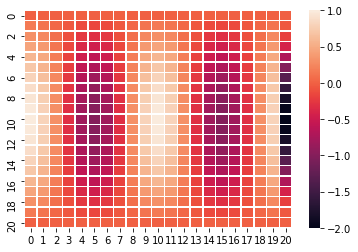

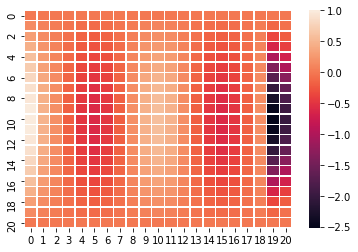

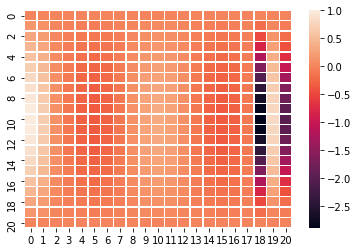

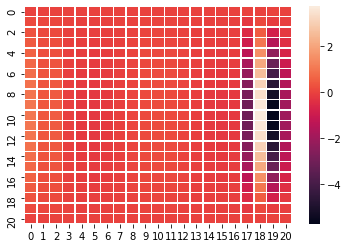

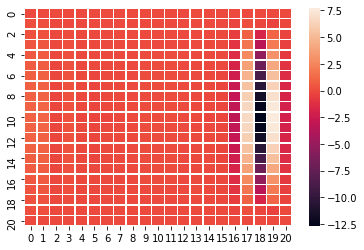

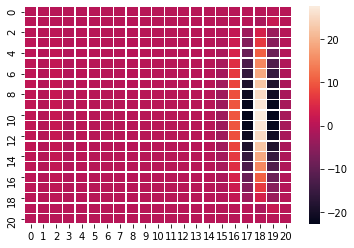

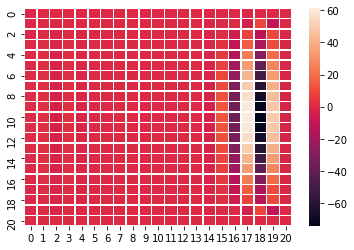

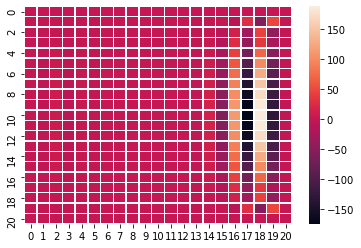

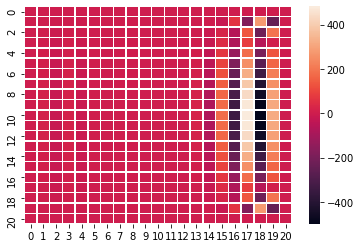

In [110]:
# Main Code

for t in range(0,int(total_time/t_step)-1,1):
  for i in range(1,int(x_length/x_step),1):
  #print(i)
    for j in range(1,int(y_length/y_step),1):
      #print(j)
      temperature[t+1,i,j] = new_temp( (temperature[t,i+1,j]) , (temperature[t,i,j]), (temperature[t,i-1,j]),
                                      (temperature[t,i,j+1]), (temperature[t,i,j-1]), C, t_step)
  #print (temperature[t,:,:])
  plt.figure()
  ax = sns.heatmap((temperature[t,:,:]), linewidth=0.5)
  plt.show()
  #plt.imshow((temperature[t,:,:]), cmap='hot', interpolation='nearest')
  #time.sleep(5)    


In [111]:
print (temperature)

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.56434465e-01  1.26558141e-01  4.83409082e-02 ...  4.83409082e-02
    1.26558141e-01 -4.89434837e-02]
  [ 3.09016994e-01  2.50000000e-01  9.54915028e-02 ...  9.54915028e-02
    2.50000000e-01 -1.90983006e-01]
  ...
  [ 3.09016994e-01  2.50000000e-01  9.54915028e-02 ...  9.54915028e-02
    2.50000000e-01 -1.90983006e-01]
  [ 1.56434465e-01  1.26558141e-01  4.83409082e-02 ...  4.83409082e-02
    1.26558141e-01 -4.89434837e-02]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.56434465e-01  7.51009511e-02  2.86860107e-02 ...  2.86860107e-02
   -1.30276998e-01 -4.89434837e-02]
  [ 3.09016994e-01  1.48352667e-01  5.66656767e-02 ...  5.66656767e-02
   -3.51647333e-01 -1.90983006e-01]
  ...
  [ 3.09016994e-01  1.4